In [1]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../scratch/gpfs/cj1223/GraphStorage/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,35]+list(range(37,60)))

In [2]:
os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

['vlarge_all_4t_z1.0_standard_quant',
 'vlarge_all_4t_z1.0_quantile_raw',
 'vlarge_all_4t_z2.0_standard_quant',
 'vlarge_all_4t_z2.0_None',
 'redshift_scan_0',
 'vlarge_all_4t_z0.0_quantile_stand',
 'vlarge_all_multi_try1',
 'vlarge_all_4t_z2.0_quantile_raw',
 'vlarge_all_4t_z0.0_standard_quant',
 'vlarge_all_4t_z0.5_quantile_quant',
 'vlarge_all_4t_z2.0_quantile_stand',
 'vlarge_all_4t_z1.0_quantile_quant',
 'transformers',
 'vlarge_all_4t_z0.0_standard_raw',
 'vlarge_all_4t_z0.5_standard_stand',
 'vlarge_all_4t_z0.5_standard_quant',
 'vlarge_all_4t_z0.0_quantile_raw',
 'old',
 'vlarge_all_4t_z1.0_None',
 'vlarge_all_4t_z1.0_standard_stand',
 'vlarge_all_4t_z2.0_standard_raw',
 'vlarge_all_4t_z0.5_standard_raw',
 'vlarge_all_4t_z0.0_None',
 'vlarge_all_4t_z0.5_quantile_raw',
 'vlarge_all_4t_z1.0_standard_raw',
 'vlarge_all_smass',
 'vlarge_all_4t_z0.0_quantile_quant',
 'vlarge_all_4t_z0.5_quantile_stand',
 'vlarge_all_4t_z0.0_standard_stand',
 'vlarge_all_4t_z1.0_quantile_stand',
 'vl

In [3]:
cases=['vlarge_all_4t_z0.0_None','vlarge_all_4t_z0.5_None', 'vlarge_all_4t_z1.0_None', 'vlarge_all_4t_z2.0_None']
# dataset=[]
xss=[]
yss=[]
lss=[]
edge_indexs=[]
edge_attrs=[]
splits=[]
ltot=[]
for case in tqdm(cases):
    data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))
#     dataset.append(data)
    xs=[]
    ys=[]
    ls=[]
    edge_index=[]
    edge_attr=[]
    for d in data:
        xs.append(d.x.numpy())
        ys.append(d.y.numpy())
        edge_index.append(d.edge_index)
        edge_attr.append(d.edge_attr)
        l=len(d.x.numpy())
        ls.append(l)
    edge_indexs.append(edge_index)
    edge_attrs.append(edge_attr)
    xs=np.vstack(xs)
    ltot.append(len(xs))
    ys=np.vstack(ys)
    ls=np.array(ls)
    splits.append(np.cumsum(ls))
    xss.append(xs)
    yss.append(ys)
    lss.append(ls)
yls=[]
for y in yss:
    yls.append(len(y))

100%|███████████████████████████████████████████████████████████████████| 4/4 [03:56<00:00, 59.12s/it]


## Scale the targets

In [4]:
### targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)
targets=[8,11,15,23]
colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})') 
yss=np.vstack(yss)

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.34s/it]


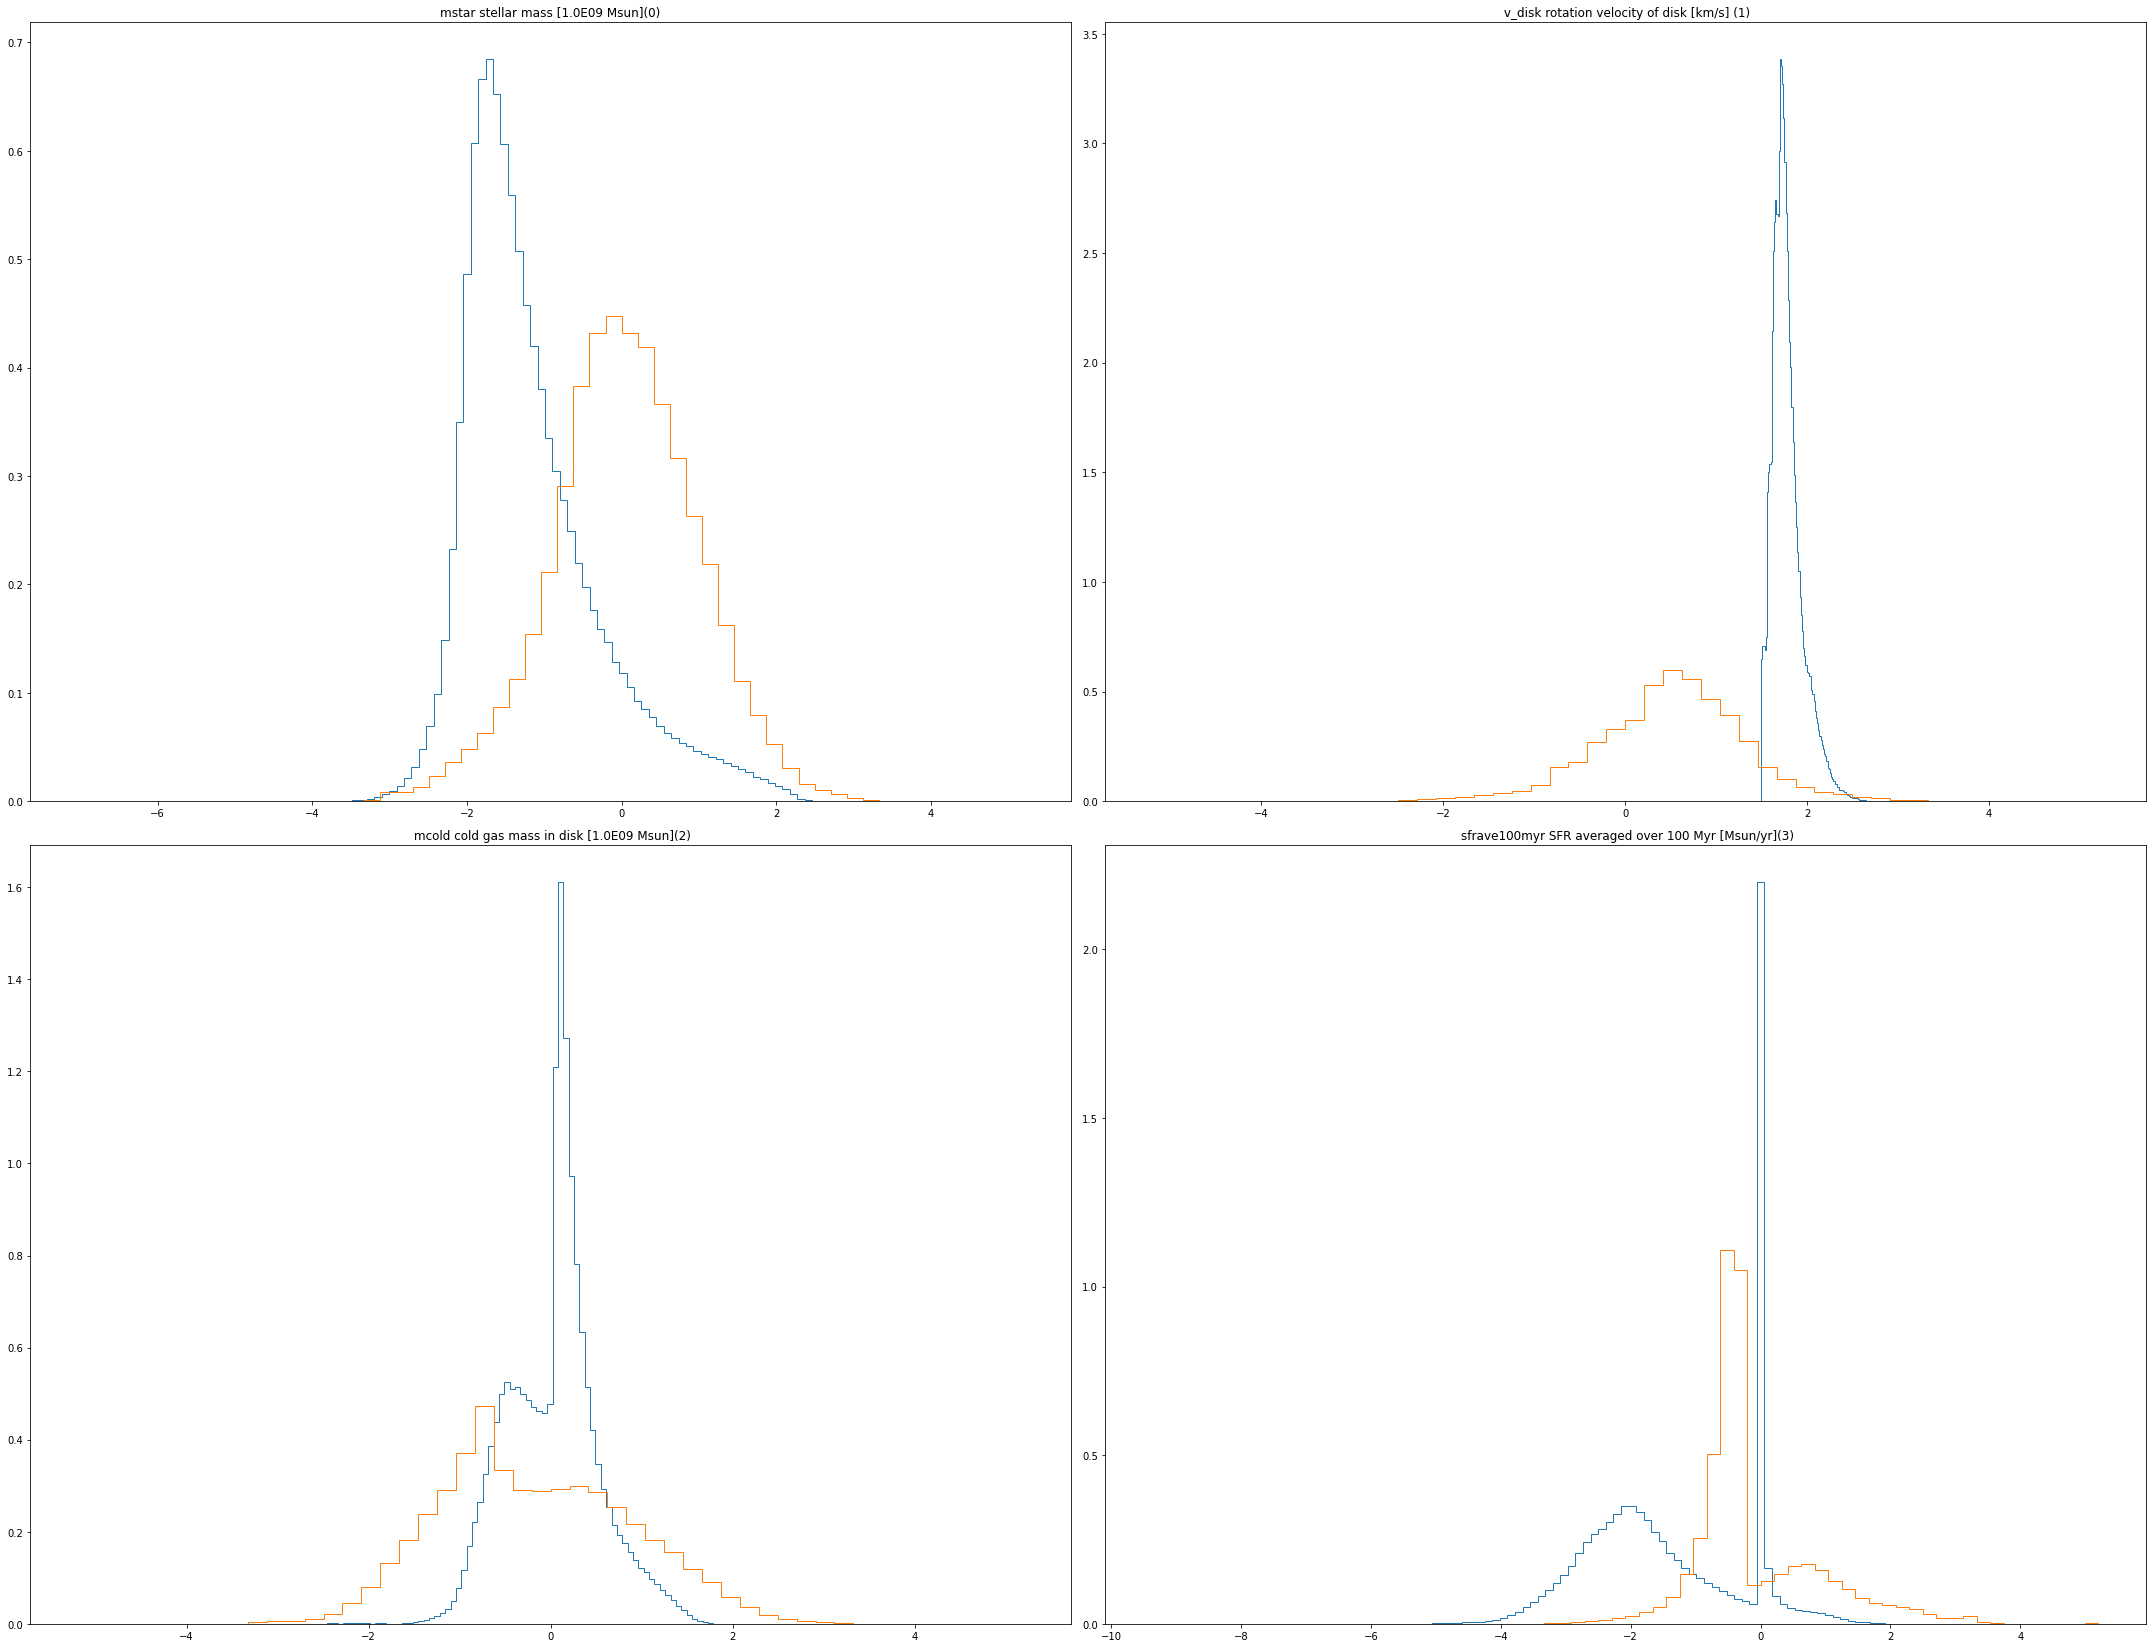

In [5]:
transform='quantile'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_4t.pkl")
scaler=pickle.load(open(transform_path, 'rb'))

fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(30,23))
ax=ax.flatten()
ysQuant=np.copy(yss)
for i in tqdm(range(len(cols_t))):
    new=scaler[targets[i]].transform(yss[:,i].reshape(-1,1))
    ysQuant[:,i]=np.hstack(new)
    ax[i].hist(yss[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

In [6]:
yssplitQuant=np.split(ysQuant, np.cumsum(yls)[:-1])

100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.18s/it]


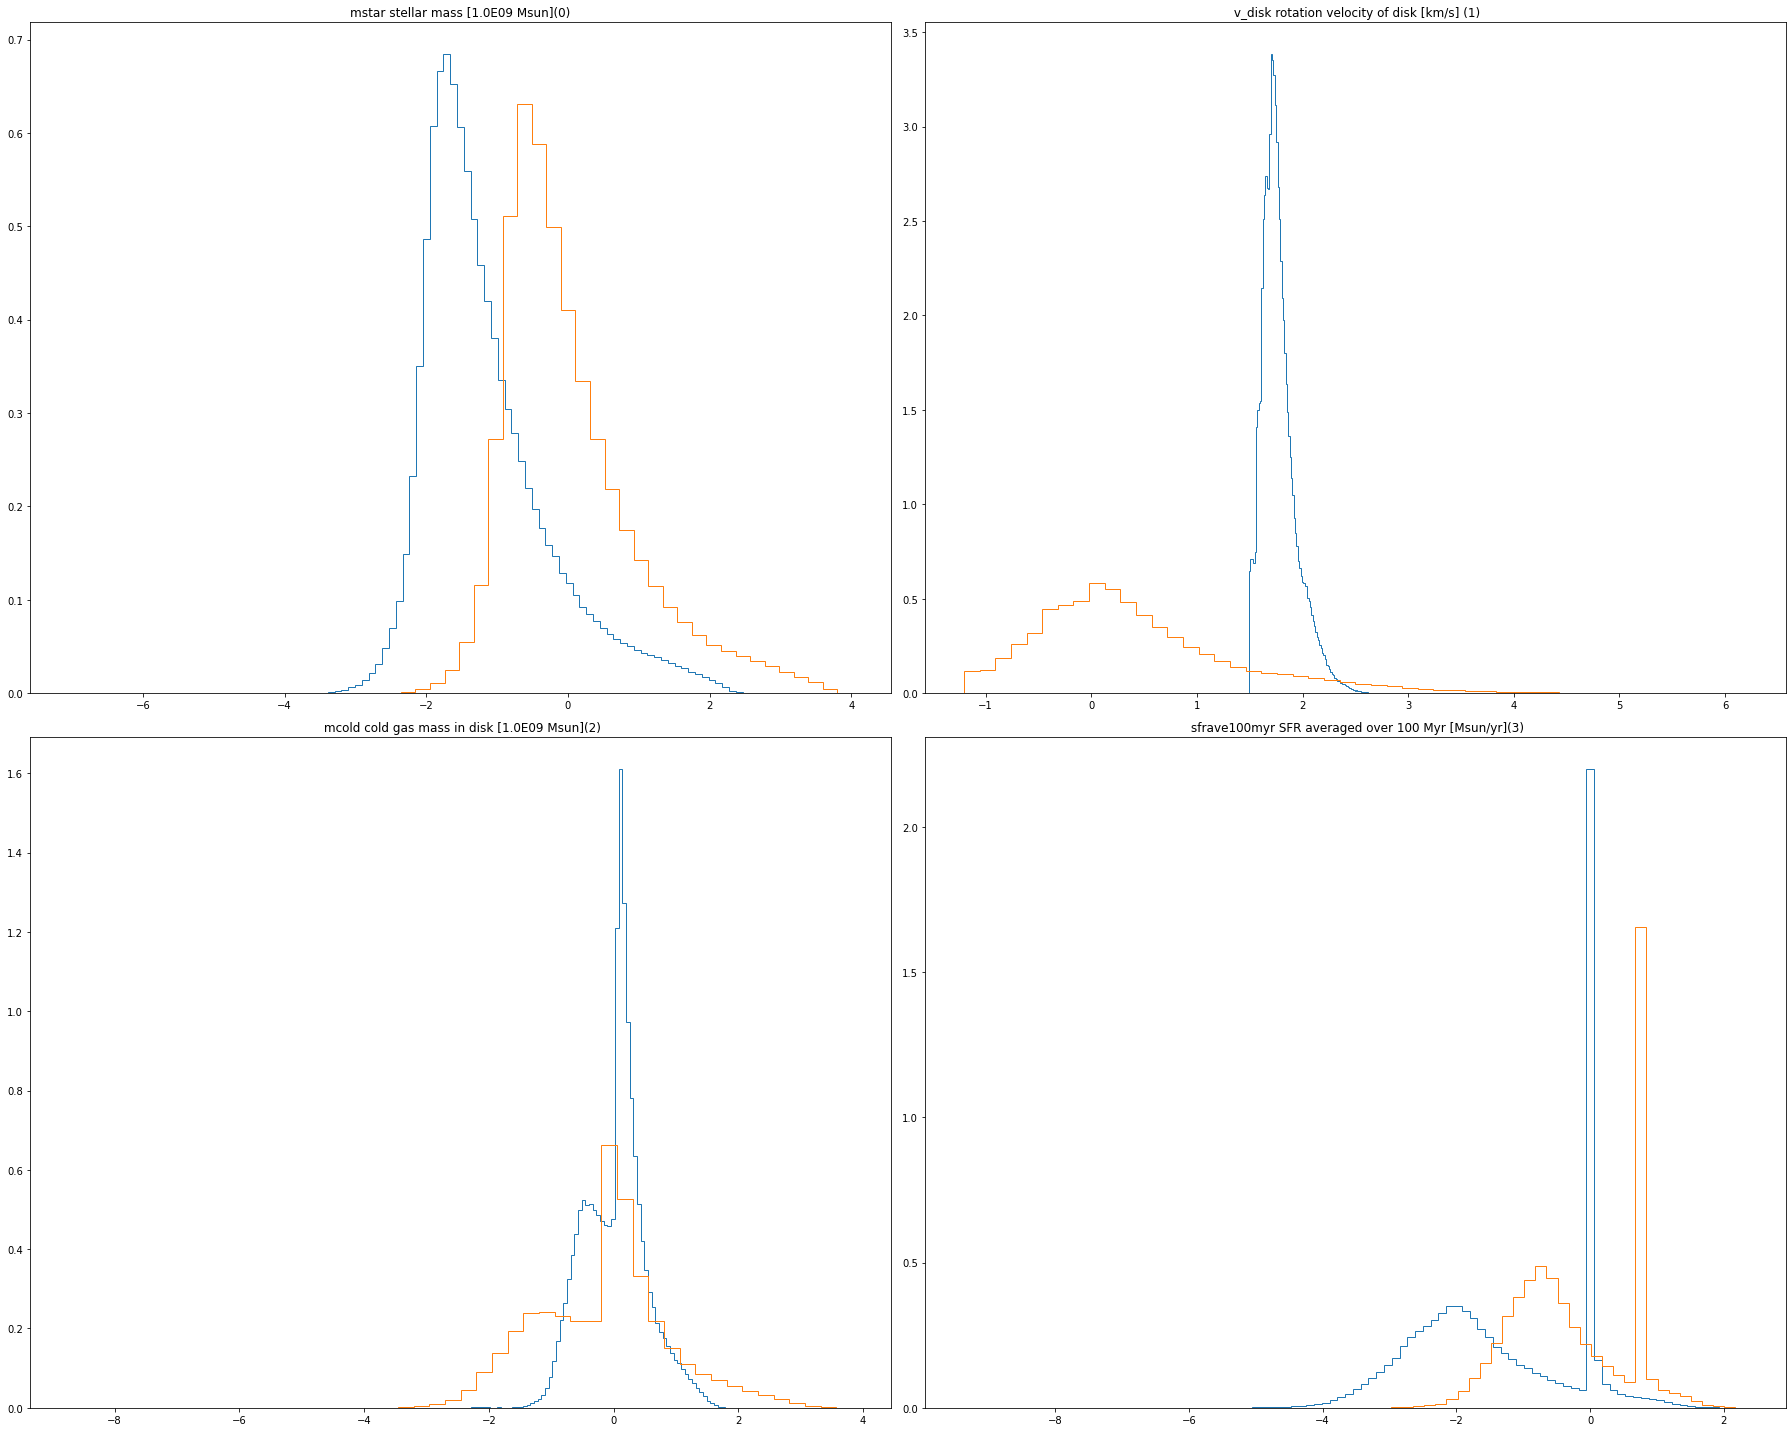

In [7]:
transform='standard'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_4t.pkl")
scaler0=pickle.load(open(transform_path, 'rb'))

# transform='power'
# transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_alltarg_1.pkl")
# scaler1=pickle.load(open(transform_path, 'rb'))


fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(25,20))
ax=ax.flatten()

ysStandard=np.copy(yss)
# ysPower=np.copy(yss)

for i in tqdm(range(len(cols_t))):
    
    ax[i].hist(yss[:,i], bins=100, density=1, histtype='step');
    new=scaler0[targets[i]].transform(yss[:,i].reshape(-1,1))
    ysStandard[:,i]=np.hstack(new)
    ax[i].hist(new, bins=50, density=1, histtype='step');
#     new=scaler1[targets[i]].transform(new)
#     ysPower[:,i]=np.hstack(new)

#     ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

In [8]:
scaler0[8].scale_, scaler0[8].mean_

(array([0.93492807]), array([-1.18660497]))

In [9]:
yssplitStandard=np.split(ysStandard, np.cumsum(yls)[:-1])
yssplitRaw=np.split(yss, np.cumsum(yls)[:-1])

In [10]:
targs={'quant': yssplitQuant,
      'stand': yssplitStandard,
      'raw': yssplitRaw}

In [11]:
ys=[]
for y in yssplitQuant:
    ys.append(y)
ys=np.vstack(ys)

476698

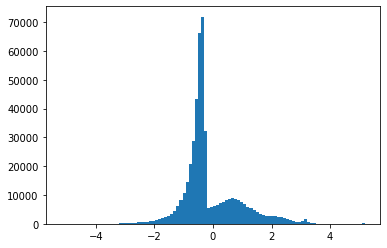

In [12]:
plt.hist(ys[:,3], bins=100);
len(ys)

## Scale the inputs

In [13]:
xss=np.vstack(xss)

In [14]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')

In [15]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

100%|█████████████████████████████████████████████████████████████████| 43/43 [02:04<00:00,  2.90s/it]


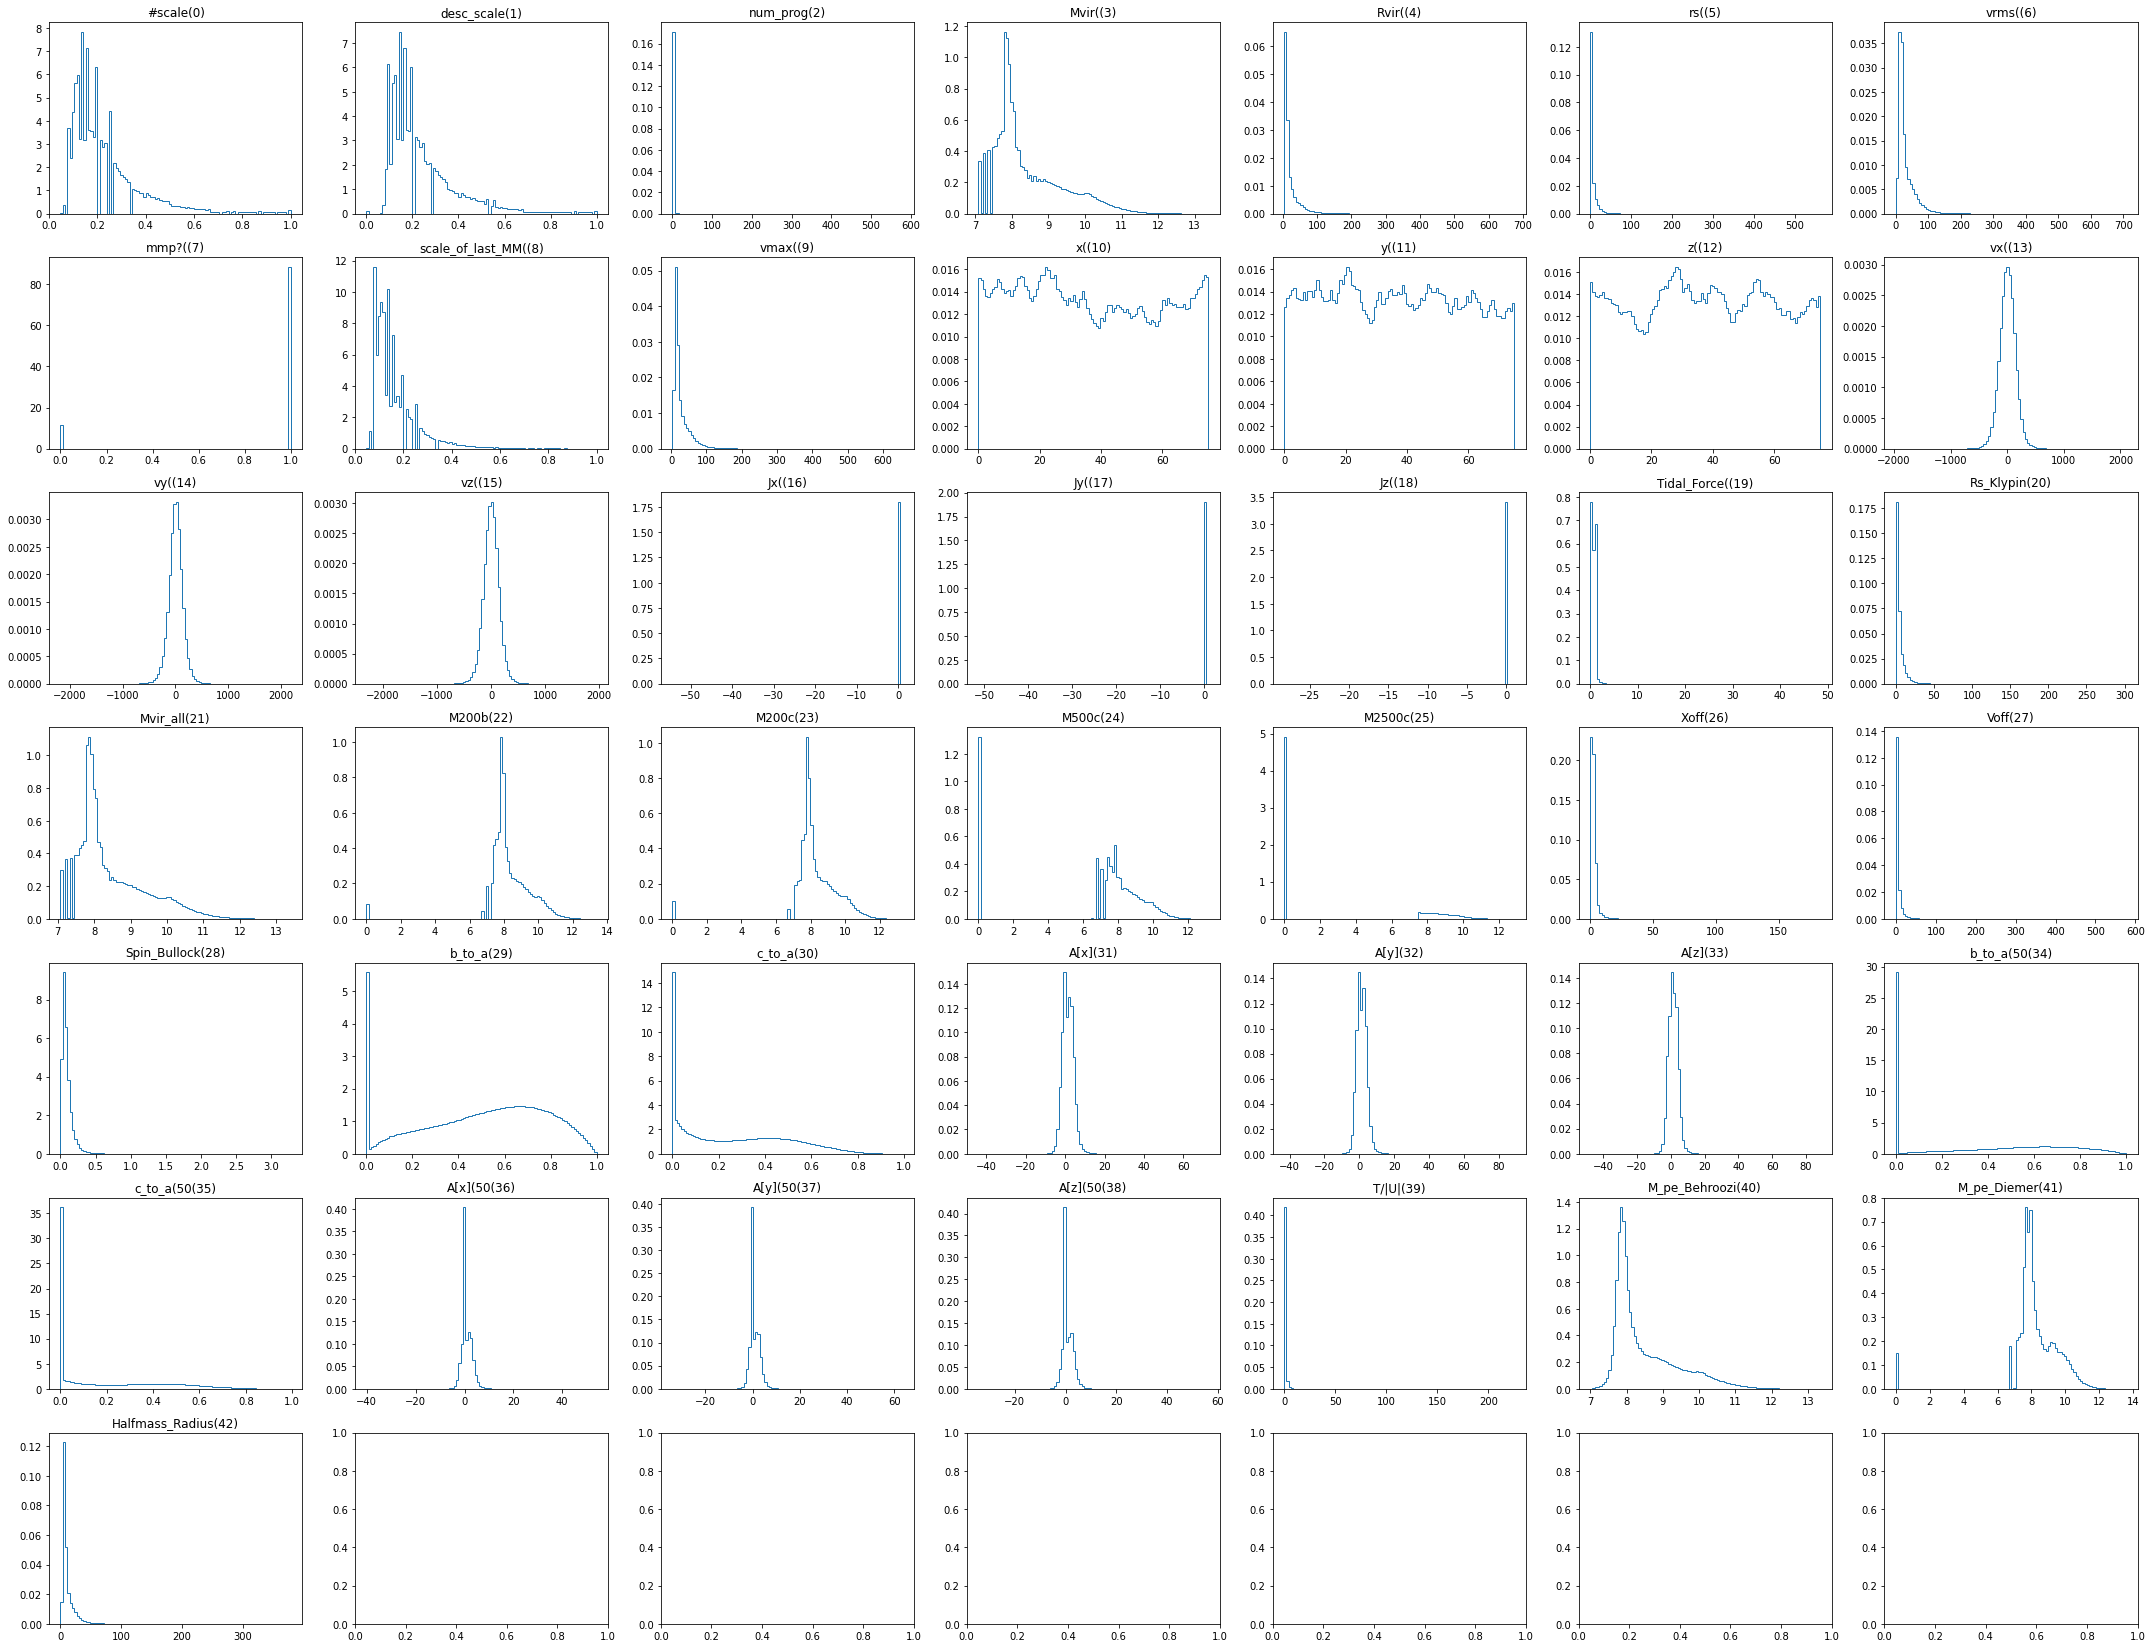

In [16]:
##raw plot

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xss[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

100%|██████████████████████████████████████████████████████████████| 43/43 [2:28:52<00:00, 207.74s/it]


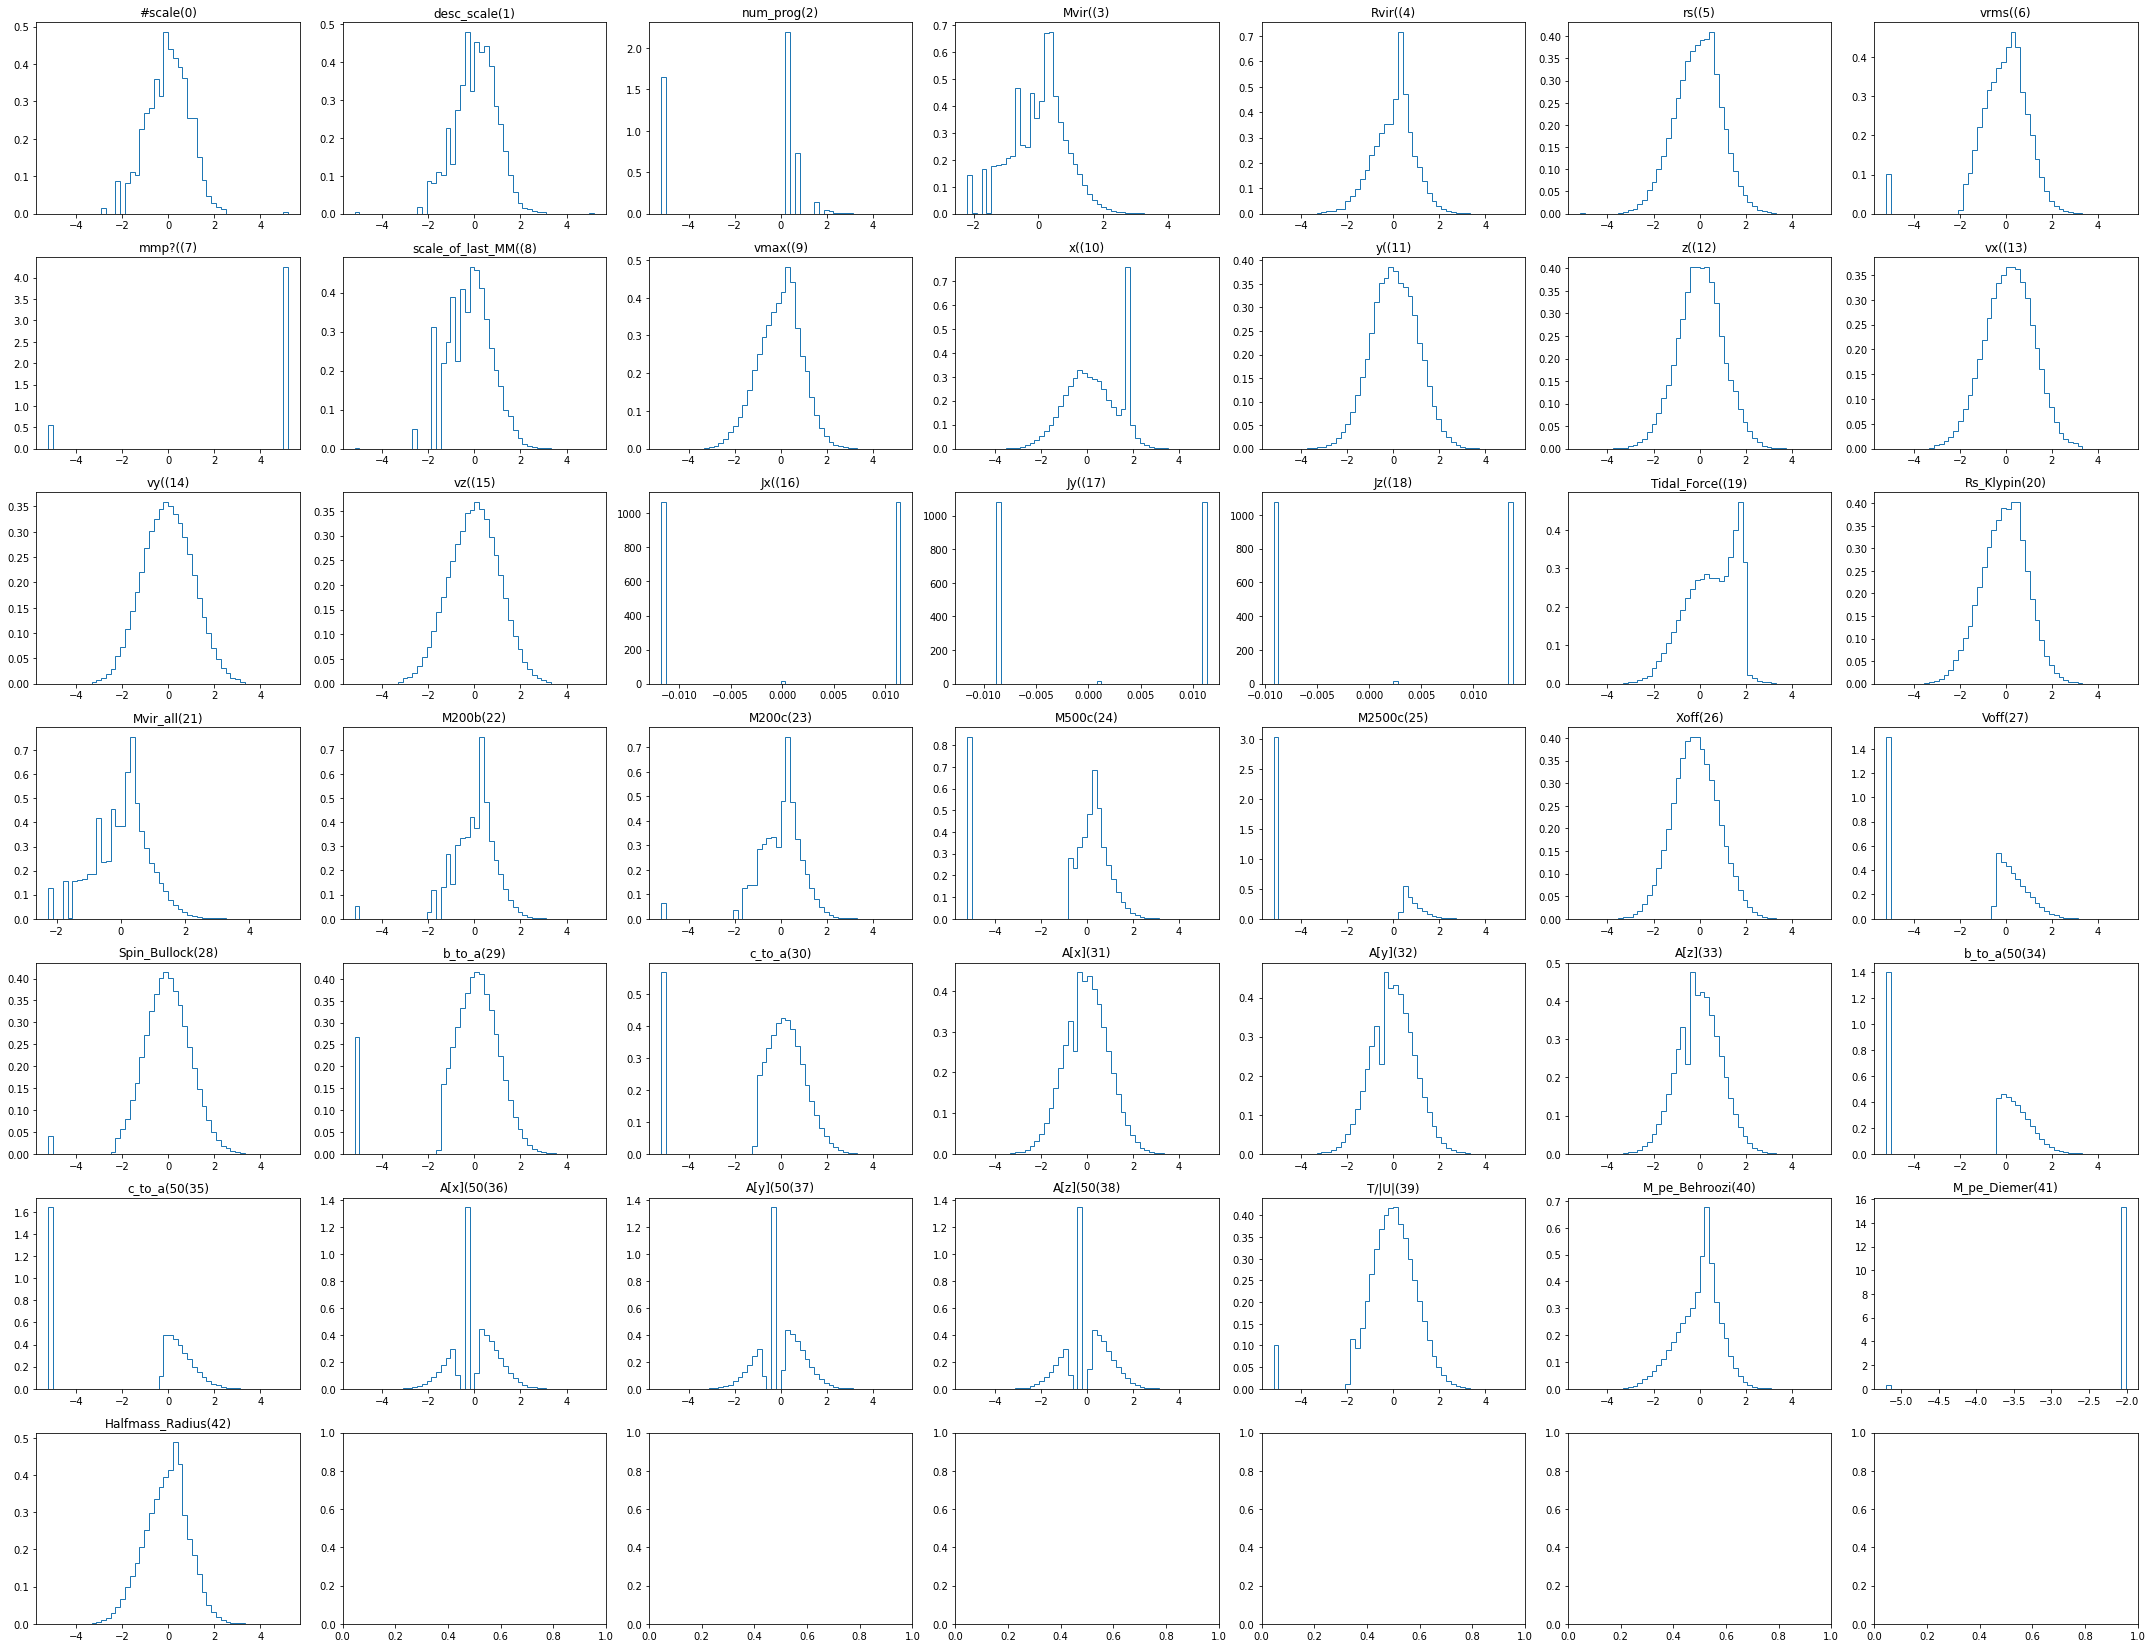

In [17]:
transform='quantile'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_1.pkl")
scaler=pickle.load(open(transform_path, 'rb'))

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()
xsQuant=np.copy(xss)
for i in tqdm(range(len(cols_h))):
    new=scaler[all_cols[i]].transform(xss[:,i].reshape(-1,1))
    xsQuant[:,i]=np.hstack(new)
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [18]:
xssplit=np.split(xsQuant, np.cumsum(ltot)[:-1])
graph_xs = []
for i, x in enumerate(xssplit):
    graph_xs.append(np.split(x, np.cumsum(lss[i])[:-1]))
targ=['quant', 'stand', 'raw']
for t in targ:
    yspe=targs[t]
    
    for i, case in enumerate(cases):
        dat=[]
        for n in tqdm(range(len(graph_xs[i]))):
            x = torch.tensor(graph_xs[i][n], dtype=torch.float)
            y=torch.tensor(yspe[i][n], dtype=torch.float)
            graph=Data(x=x, edge_index=edge_indexs[i][n], edge_attr=edge_attrs[i][n], y=y)
            dat.append(graph)
        case=case[:-4]+f'{transform}'+f'_{t}'
        print(case)
        print("Saving dataset")
        if not osp.exists(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')):
            os.mkdir(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}'))

        with open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'wb') as handle:
            print(handle)
            pickle.dump(dat, handle)

100%|███████████████████████████████████████████████████████| 108808/108808 [00:16<00:00, 6502.64it/s]


vlarge_all_4t_z0.0_quantile_quant
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_quantile_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:14<00:00, 8774.85it/s]


vlarge_all_4t_z0.5_quantile_quant
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_quantile_quant/data.pkl'>


100%|██████████████████████████████████████████████████████| 126565/126565 [00:12<00:00, 10483.17it/s]


vlarge_all_4t_z1.0_quantile_quant
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_quantile_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 118127/118127 [00:20<00:00, 5814.66it/s]


vlarge_all_4t_z2.0_quantile_quant
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_quantile_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 108808/108808 [00:13<00:00, 8002.36it/s]


vlarge_all_4t_z0.0_quantile_stand
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_quantile_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:12<00:00, 9892.81it/s]


vlarge_all_4t_z0.5_quantile_stand
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_quantile_stand/data.pkl'>


100%|██████████████████████████████████████████████████████| 126565/126565 [00:12<00:00, 10357.65it/s]


vlarge_all_4t_z1.0_quantile_stand
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_quantile_stand/data.pkl'>


100%|██████████████████████████████████████████████████████| 118127/118127 [00:10<00:00, 10931.60it/s]


vlarge_all_4t_z2.0_quantile_stand
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_quantile_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 108808/108808 [00:18<00:00, 5827.81it/s]


vlarge_all_4t_z0.0_quantile_raw
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_quantile_raw/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:13<00:00, 9030.21it/s]


vlarge_all_4t_z0.5_quantile_raw
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_quantile_raw/data.pkl'>


100%|███████████████████████████████████████████████████████| 126565/126565 [00:13<00:00, 9452.36it/s]


vlarge_all_4t_z1.0_quantile_raw
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_quantile_raw/data.pkl'>


100%|██████████████████████████████████████████████████████| 118127/118127 [00:10<00:00, 11442.40it/s]


vlarge_all_4t_z2.0_quantile_raw
Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_quantile_raw/data.pkl'>


In [19]:
datat=pickle.load(open(osp.expanduser(\
    f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_quantile_stand/data.pkl'), 'rb'))

In [20]:
datat=pickle.load(open(osp.expanduser(\
    f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_quantile_quant/data.pkl'), 'rb'))

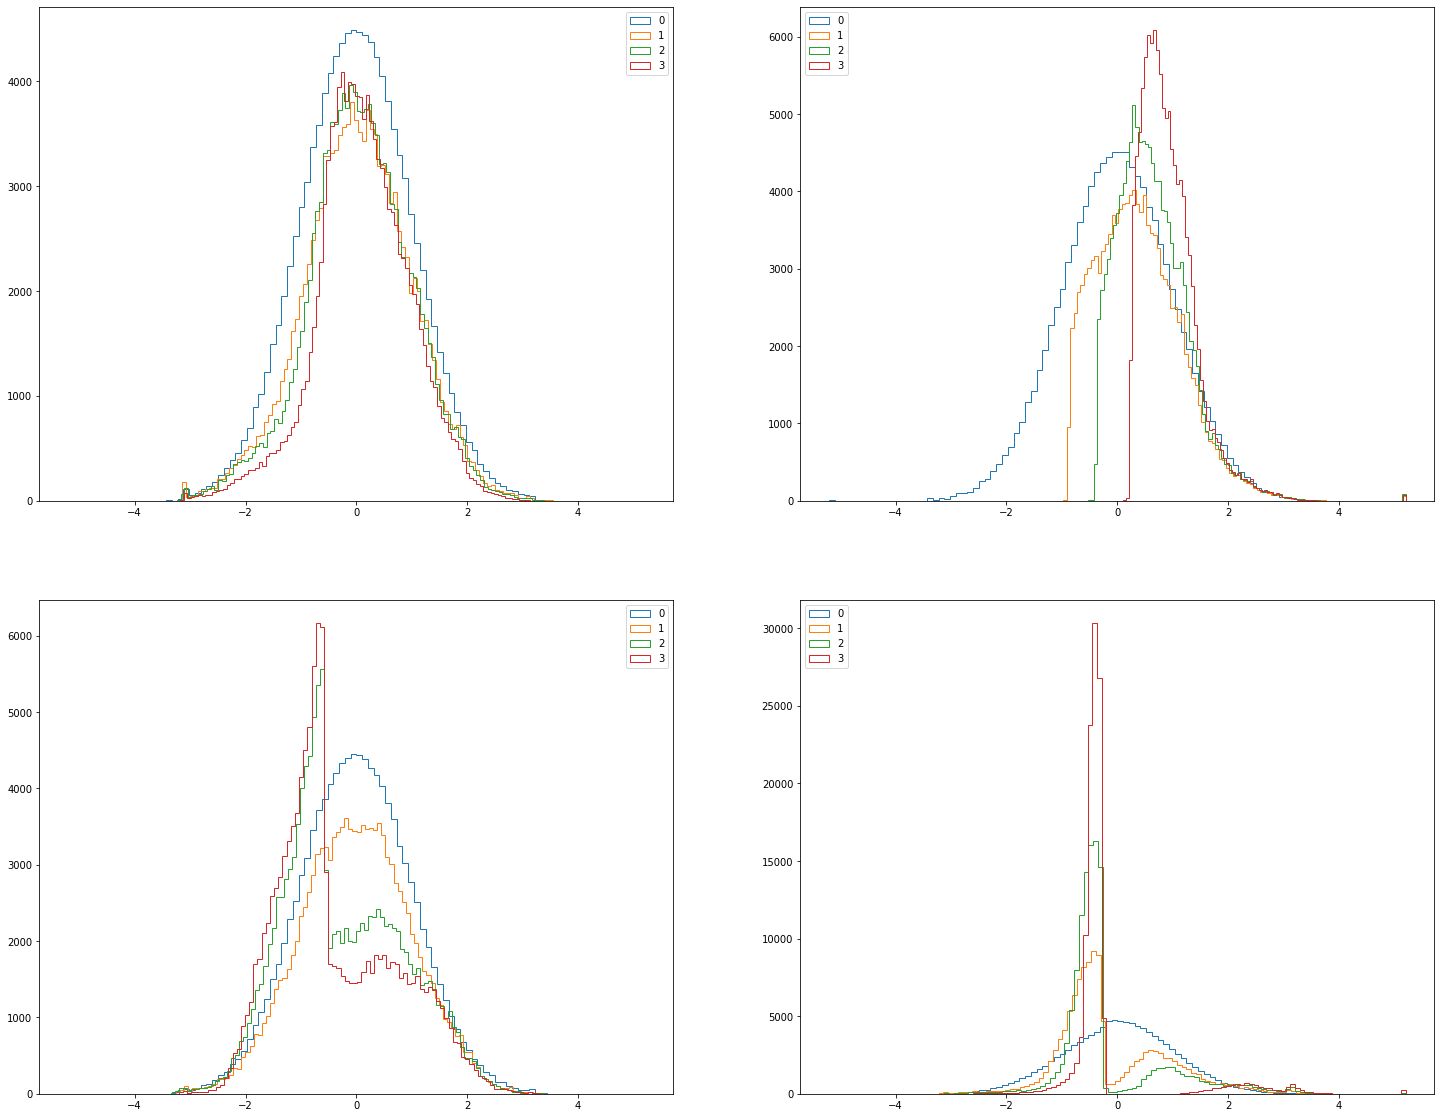

In [21]:
ys=[]
for d in datat:
    ys.append(d.y.numpy())
ys=np.array(ys)
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(25,20))
ax=ax.flatten()
for i in range(4):
    for j in range(4):
#         ax[i].hist(yssplitRaw[j][:,i], bins=100, histtype='step', label=f'raw {j}')
        ax[i].hist(np.array(yssplitQuant[j])[:,i], bins=100, histtype='step', label=j)   
    ax[i].legend()

In [22]:

np.corrcoef(yssplitQuant[0].T)

array([[1.        , 0.77040763, 0.45407752, 0.53723047],
       [0.77040763, 1.        , 0.68448752, 0.54467463],
       [0.45407752, 0.68448752, 1.        , 0.51410482],
       [0.53723047, 0.54467463, 0.51410482, 1.        ]])

### Check that everything works

In [23]:
datat[:5], data[:5]

([Data(x=[57, 43], edge_index=[2, 56], edge_attr=[56], y=[4]),
  Data(x=[94, 43], edge_index=[2, 93], edge_attr=[93], y=[4]),
  Data(x=[50, 43], edge_index=[2, 49], edge_attr=[49], y=[4]),
  Data(x=[141, 43], edge_index=[2, 140], edge_attr=[140], y=[4]),
  Data(x=[81, 43], edge_index=[2, 80], edge_attr=[80], y=[4])],
 [Data(x=[57, 43], edge_index=[2, 56], edge_attr=[56], y=[4]),
  Data(x=[94, 43], edge_index=[2, 93], edge_attr=[93], y=[4]),
  Data(x=[50, 43], edge_index=[2, 49], edge_attr=[49], y=[4]),
  Data(x=[141, 43], edge_index=[2, 140], edge_attr=[140], y=[4]),
  Data(x=[81, 43], edge_index=[2, 80], edge_attr=[80], y=[4])])

100%|██████████████████████████████████████████████████████████████| 43/43 [2:25:27<00:00, 202.96s/it]


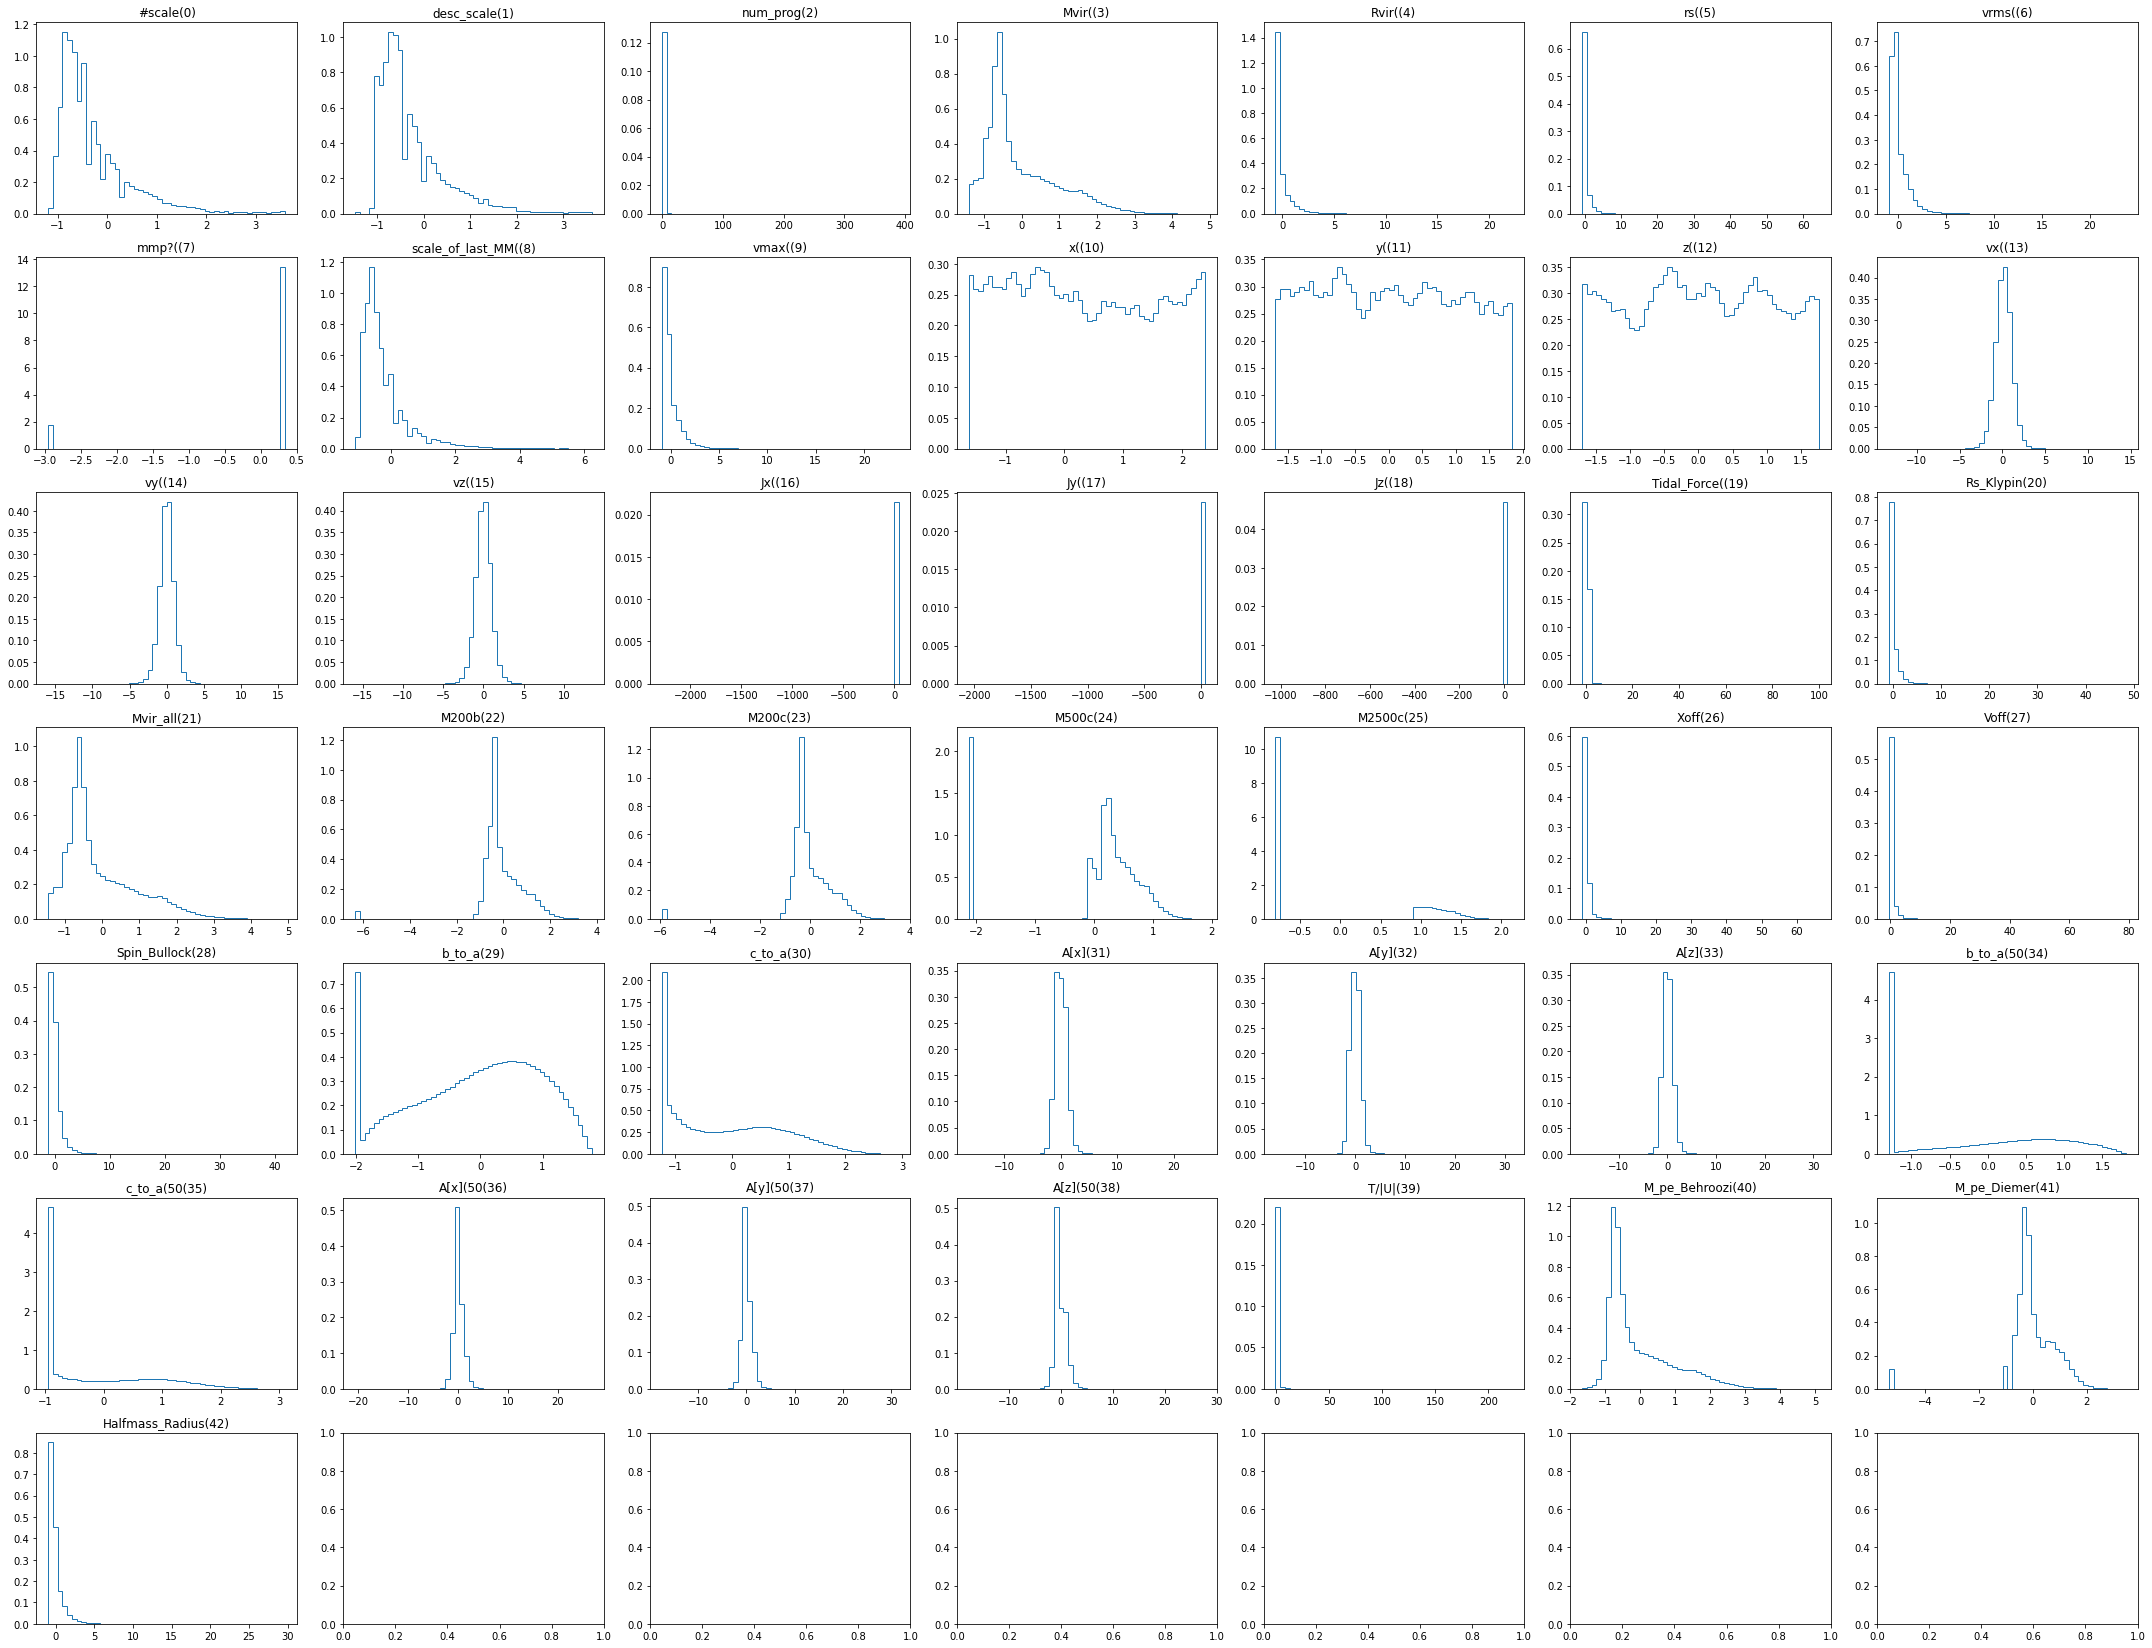

In [24]:
transform='standard'
transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_4t.pkl")
scaler0=pickle.load(open(transform_path, 'rb'))

# transform='power'
# transform_path=osp.expanduser(f"~/../../../scratch/gpfs/cj1223/GraphStorage/transformers/{transform}_allfeat_1.pkl")
# scaler1=pickle.load(open(transform_path, 'rb'))


fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

xsStandard=np.copy(xss)
xsPower=np.copy(xss)

for i in tqdm(range(len(cols_h))):
    
#     ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    new=scaler0[all_cols[i]].transform(xss[:,i].reshape(-1,1))
    xsStandard[:,i]=np.hstack(new)
    ax[i].hist(new, bins=50, density=1, histtype='step');
#     new=scaler1[all_cols[i]].transform(new)
#     xsPower[:,i]=np.hstack(new)

#     ax[i].hist(new, bins=50, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

In [25]:
transform='standard'
xssplit=np.split(xsStandard, np.cumsum(ltot)[:-1])
graph_xs = []
for i, x in enumerate(xssplit):
    graph_xs.append(np.split(x, np.cumsum(lss[i])[:-1]))
targ=['quant', 'stand', 'raw']
for t in targ:
    yspe=targs[t]
    
    for i, case in enumerate(cases):
        dat=[]
        for n in tqdm(range(len(graph_xs[i]))):
            x = torch.tensor(graph_xs[i][n], dtype=torch.float)
            y=torch.tensor(yspe[i][n], dtype=torch.float)
            graph=Data(x=x, edge_index=edge_indexs[i][n], edge_attr=edge_attrs[i][n], y=y)
            dat.append(graph)
        case=case[:-4]+f'{transform}'+f'_{t}'
        print("Saving dataset")
        if not osp.exists(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')):
            os.mkdir(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}'))

        with open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'wb') as handle:
            print(handle)
            pickle.dump(dat, handle)

100%|███████████████████████████████████████████████████████| 108808/108808 [00:22<00:00, 4766.26it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_standard_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:16<00:00, 7517.58it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_standard_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 126565/126565 [00:24<00:00, 5262.86it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_standard_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 118127/118127 [00:13<00:00, 9061.82it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_standard_quant/data.pkl'>


100%|███████████████████████████████████████████████████████| 108808/108808 [00:22<00:00, 4734.30it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_standard_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:18<00:00, 6545.59it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_standard_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 126565/126565 [00:23<00:00, 5380.36it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_standard_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 118127/118127 [00:13<00:00, 8897.29it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_standard_stand/data.pkl'>


100%|███████████████████████████████████████████████████████| 108808/108808 [00:17<00:00, 6251.74it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.0_standard_raw/data.pkl'>


100%|███████████████████████████████████████████████████████| 123198/123198 [00:23<00:00, 5175.79it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z0.5_standard_raw/data.pkl'>


100%|███████████████████████████████████████████████████████| 126565/126565 [00:24<00:00, 5233.39it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z1.0_standard_raw/data.pkl'>


100%|███████████████████████████████████████████████████████| 118127/118127 [00:13<00:00, 8730.81it/s]


Saving dataset
<_io.BufferedWriter name='/home/cj1223/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_standard_raw/data.pkl'>


In [26]:
datat=pickle.load(open(osp.expanduser(\
        f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_z2.0_standard_stand/data.pkl'), 'rb'))

In [27]:
datat[:5], data[:5]

([Data(x=[57, 43], edge_index=[2, 56], edge_attr=[56], y=[4]),
  Data(x=[94, 43], edge_index=[2, 93], edge_attr=[93], y=[4]),
  Data(x=[50, 43], edge_index=[2, 49], edge_attr=[49], y=[4]),
  Data(x=[141, 43], edge_index=[2, 140], edge_attr=[140], y=[4]),
  Data(x=[81, 43], edge_index=[2, 80], edge_attr=[80], y=[4])],
 [Data(x=[57, 43], edge_index=[2, 56], edge_attr=[56], y=[4]),
  Data(x=[94, 43], edge_index=[2, 93], edge_attr=[93], y=[4]),
  Data(x=[50, 43], edge_index=[2, 49], edge_attr=[49], y=[4]),
  Data(x=[141, 43], edge_index=[2, 140], edge_attr=[140], y=[4]),
  Data(x=[81, 43], edge_index=[2, 80], edge_attr=[80], y=[4])])